In [8]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os

main_folder = '/Users/evangelosgeraridis/Desktop/b20'

for subfolder in os.listdir(main_folder):
    if subfolder == '.DS_Store':
        continue

    subfolder_path = os.path.join(main_folder, subfolder)

    if not os.path.isdir(subfolder_path):
        continue

    # Load the fridge data
    fridge_file = os.path.join(subfolder_path, '01_fridge.parquet.gzip')
    fridge_data = pd.read_parquet(fridge_file)

    # Load the rice cooker data
    rice_cooker_file = os.path.join(subfolder_path, '02_rice-cooker.parquet.gzip')
    rice_cooker_data = pd.read_parquet(rice_cooker_file)

    # Load the total data
    total_file = os.path.join(subfolder_path, '00_total.parquet.gzip')
    total_data = pd.read_parquet(total_file)

    

In [9]:
combined_data = pd.concat([total_data, fridge_data, rice_cooker_data], axis=1)
data = pd.DataFrame()
data = data.append(combined_data)
data

/var/folders/nc/r0ghbp811_gdhf1gdndmcjt40000gn/T/ipykernel_897/954569428.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(combined_data)


,active_power,reactive_power,timestamp,active_power,reactive_power,timestamp,active_power,reactive_power,timestamp
1288530,329.81,-265.54,1.488845e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288531,334.01,-265.55,1.488845e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288532,330.44,-265.68,1.488845e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288533,334.51,-264.98,1.488845e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288534,328.51,-265.15,1.488845e+12,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1288525,627.87,-25.73,1.488931e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288526,576.82,-25.09,1.488931e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288527,550.50,-26.27,1.488931e+12,NaN,NaN,NaN,NaN,NaN,NaN
1288528,542.86,-24.74,1.488931e+12,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data = data.dropna()
data.columns = ['total_active_power','total_reactive_power','ts', 'fridge_active_power', 'fridge_reactive_power', 'ts1','rice_active_power', 'rice_reactive_power','ts2']
data = data.drop(['ts1','ts2'],axis=1)
data = data.set_index('ts')
data

,total_active_power,total_reactive_power,fridge_active_power,fridge_reactive_power,rice_active_power,rice_reactive_power
ts,,,,,,
1.488845e+12,297.21,-33.64,60.46,14.41,0.27,1.86
1.488845e+12,295.79,-32.67,60.19,14.29,0.24,1.82
1.488845e+12,310.30,-33.19,65.13,14.14,0.27,1.86
1.488845e+12,300.99,-33.90,68.72,14.56,0.32,1.88
1.488845e+12,335.86,-32.40,68.40,14.39,0.30,1.87
...,...,...,...,...,...,...
1.488930e+12,286.65,-48.08,0.00,0.00,0.29,1.96
1.488930e+12,328.17,-44.67,0.00,0.00,0.24,1.75
1.488930e+12,329.20,-44.09,0.00,0.00,0.18,1.87


/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RMSE: 350.714602340955
MAE: 251.22973333281016
RMAE: 16.22400396884317
MSE: 123000.73229517421


/var/folders/nc/r0ghbp811_gdhf1gdndmcjt40000gn/T/ipykernel_897/3798949408.py:90: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


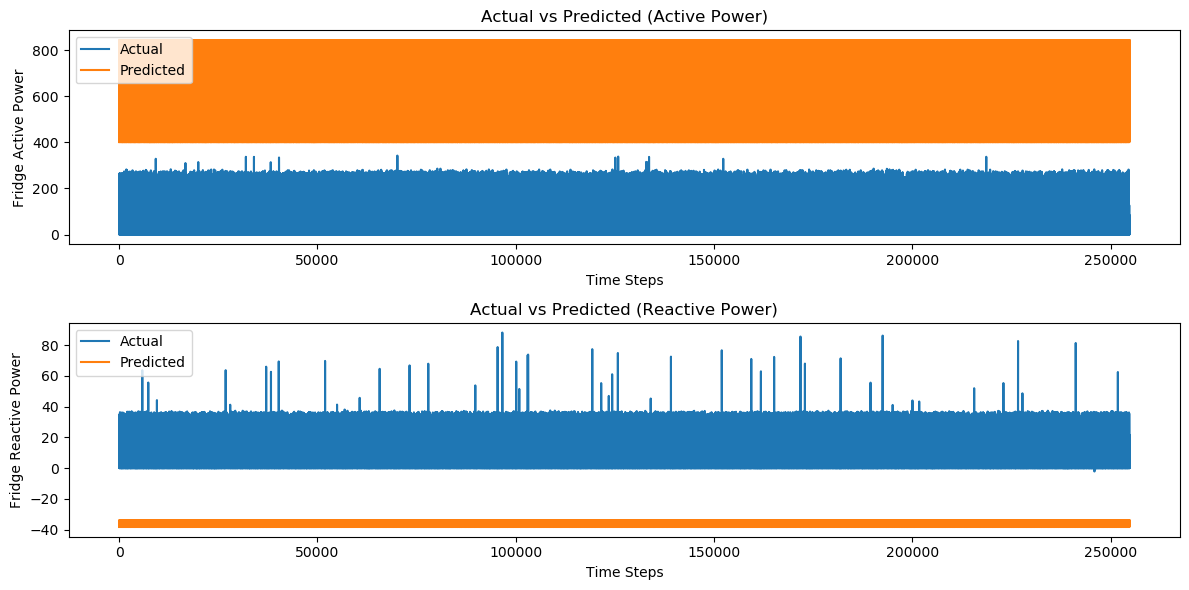

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

class FHMM:
    def __init__(self, num_states=2, num_cluster=2):
        self.num_states = num_states
        self.num_cluster = num_cluster
        self.means = None

    def train(self, X):
        X = self.create_input(X)
        self.means = KMeans(n_clusters=self.num_cluster).fit(X).cluster_centers_

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for i in range(n_samples):
            X_sample = X_agg[i].reshape(1, -1)
            distances = np.linalg.norm(X_sample - self.means, axis=1)
            closest_cluster = np.argmin(distances)
            Y[i] = self.means[closest_cluster]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

# Example usage
X = data[['total_active_power', 'total_reactive_power']].values
Y = data[['fridge_active_power', 'fridge_reactive_power']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

fhmm_disaggregator = FHMM(num_states=2, num_cluster=2)
fhmm_disaggregator.train(X_train)

disaggregated_data = fhmm_disaggregator.disaggregate(X_test)

rmse = fhmm_disaggregator.calculate_rmse(Y_test, disaggregated_data)
mae = fhmm_disaggregator.calculate_mae(Y_test, disaggregated_data)
rmae = fhmm_disaggregator.calculate_rmae(Y_test, disaggregated_data)
mse = fhmm_disaggregator.calculate_mse(Y_test, disaggregated_data)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"RMAE: {rmae}")
print(f"MSE: {mse}")

#plotting

time_steps = np.arange(Y_test.shape[0])

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time_steps, Y_test[:, 0], label='Actual')
plt.plot(time_steps, disaggregated_data[:, 0], label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Fridge Active Power')
plt.title('Actual vs Predicted (Active Power)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_steps, Y_test[:, 1], label='Actual')
plt.plot(time_steps, disaggregated_data[:, 1], label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Fridge Reactive Power')
plt.title('Actual vs Predicted (Reactive Power)')
plt.legend()

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

class FHMM:
    def __init__(self, num_states=2, num_cluster=2):
        self.num_states = num_states
        self.num_cluster = num_cluster
        self.means = None

    def train(self, X):
        X = self.create_input(X)
        self.means = KMeans(n_clusters=self.num_cluster).fit(X).cluster_centers_

    def create_input(self, X):
        n_samples, n_features = X.shape
        X_agg = np.zeros((n_samples, self.num_states))
        for i in range(n_samples):
            for j in range(self.num_states):
                X_agg[i, j] = np.sum(X[i, j * (n_features // self.num_states):(j + 1) * (n_features // self.num_states)])
        return X_agg

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for i in range(n_samples):
            X_sample = X_agg[i].reshape(1, -1)
            distances = np.linalg.norm(X_sample - self.means, axis=1)
            closest_cluster = np.argmin(distances)
            Y[i] = self.means[closest_cluster]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

# Example usage
X = data[['total_active_power', 'total_reactive_power']].values
Y = data[['rice_active_power', 'rice_reactive_power']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

fhmm_disaggregator = FHMM(num_states=2, num_cluster=2)
fhmm_disaggregator.train(X_train)

disaggregated_data = fhmm_disaggregator.disaggregate(X_test)

rmse = fhmm_disaggregator.calculate_rmse(Y_test, disaggregated_data)
mae = fhmm_disaggregator.calculate_mae(Y_test, disaggregated_data)
rmae = fhmm_disaggregator.calculate_rmae(Y_test, disaggregated_data)
mse = fhmm_disaggregator.calculate_mse(Y_test, disaggregated_data)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"RMAE: {rmae}")
print(f"MSE: {mse}")


/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RMSE: 372.0437580873906
MAE: 266.0614904750643
RMAE: 341.10779432808664
MSE: 138416.5579317888


In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

class FHMM:
    def __init__(self, num_states=2, num_clusters=2):
        self.num_states = num_states
        self.num_clusters = num_clusters
        self.means = None

    def train(self, X):
        X_agg = self.create_input(X)
        self.means = KMeans(n_clusters=self.num_clusters).fit(X_agg).cluster_centers_

    def create_input(self, X):
        n_samples, n_features = X.shape
        n_features_per_state = n_features // self.num_states
        X_agg = np.sum(X.reshape(n_samples, self.num_states, n_features_per_state), axis=2)
        return X_agg

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for i in range(n_samples):
            X_sample = X_agg[i].reshape(1, -1)
            distances = np.linalg.norm(X_sample - self.means, axis=1)
            closest_cluster = np.argmin(distances)
            Y[i] = self.means[closest_cluster]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

# Example usage
X = data[['total_active_power', 'total_reactive_power']].values
Y = data[['rice_active_power', 'rice_reactive_power']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

fhmm_disaggregator = FHMM(num_states=2, num_clusters=2)
fhmm_disaggregator.train(X_train)

disaggregated_data = fhmm_disaggregator.disaggregate(X_test)

rmse = fhmm_disaggregator.calculate_rmse(Y_test, disaggregated_data)
mae = fhmm_disaggregator.calculate_mae(Y_test, disaggregated_data)
rmae = fhmm_disaggregator.calculate_rmae(Y_test, disaggregated_data)
mse = fhmm_disaggregator.calculate_mse(Y_test, disaggregated_data)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"RMAE: {rmae}")
print(f"MSE: {mse}")


/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RMSE: 371.82734180682576
MAE: 265.9347612618103
RMAE: 340.9093733668006
MSE: 138255.57211513005


In [7]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

class FHMM:
    def __init__(self, num_states=2, num_cluster_init=10, num_cluster=2):
        self.num_states = num_states
        self.num_cluster_init = num_cluster_init
        self.num_cluster = num_cluster
        self.means = None

    def train(self, X):
        X_agg = self.create_input(X)
        self.means = self.train_fhmm(X_agg)

    def create_input(self, X):
        n_samples, n_features = X.shape
        n_features_per_state = n_features // self.num_states
        X_agg = np.sum(X.reshape(n_samples, self.num_states, n_features_per_state), axis=2)
        return X_agg

    def train_fhmm(self, X):
        num_samples, num_features = X.shape
        means = KMeans(n_clusters=self.num_cluster_init).fit(X).cluster_centers_
        model = KMeans(n_clusters=self.num_cluster).fit(means)
        return model.cluster_centers_

    def disaggregate(self, X):
        n_samples, n_features = X.shape
        X_agg = self.create_input(X)
        Y = np.zeros((n_samples, n_features))
        for i in range(n_samples):
            X_sample = X_agg[i].reshape(1, -1)
            distances = np.linalg.norm(X_sample - self.means, axis=1)
            closest_cluster = np.argmin(distances)
            Y[i] = self.means[closest_cluster]
        return Y

    def calculate_rmse(self, X_true, X_pred):
        return np.sqrt(mean_squared_error(X_true, X_pred))

    def calculate_mae(self, X_true, X_pred):
        return mean_absolute_error(X_true, X_pred)

    def calculate_rmae(self, X_true, X_pred):
        rmse = self.calculate_rmse(X_true, X_pred)
        return rmse / np.mean(X_true)

    def calculate_mse(self, X_true, X_pred):
        return mean_squared_error(X_true, X_pred)

    
X = data[['total_active_power', 'total_reactive_power']].values
Y = data[['rice_active_power', 'rice_reactive_power']].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

fhmm_disaggregator = FHMM(num_states=2, num_cluster_init=10, num_cluster=2)
fhmm_disaggregator.train(X_train)

disaggregated_data = fhmm_disaggregator.disaggregate(X_test)

rmse = fhmm_disaggregator.calculate_rmse(Y_test, disaggregated_data)
mae = fhmm_disaggregator.calculate_mae(Y_test, disaggregated_data)
rmae = fhmm_disaggregator.calculate_rmae(Y_test, disaggregated_data)
mse = fhmm_disaggregator.calculate_mse(Y_test, disaggregated_data)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"RMAE: {rmae}")
print(f"MSE: {mse}")


/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/miniconda3/envs/nilmenv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


RMSE: 422.3159439446168
MAE: 300.2693433644833
RMAE: 387.19977695391003
MSE: 178350.7565098327
